# Question 11

In [1]:
set0 = [0.6, 0.3, 0.7]
set1 = [0.8, 0.4, 0.5]
output = [1, 1, 0]

In [2]:
def cart(set1, set2):
  res = []

  for i in set1:
    lst = []

    for j in set2:
      lst.append(min(i, j))
    
    res.append(lst)
  
  return res

In [3]:
cartesion = cart(set0, set1)

In [4]:
cartesion

[[0.6, 0.4, 0.5], [0.3, 0.3, 0.3], [0.7, 0.4, 0.5]]

In [5]:
import tensorflow as tf

In [6]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(5, activation = 'sigmoid'), 
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [7]:
model.compile(optimizer = tf.keras.optimizers.SGD(), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [13]:
model.layers[1].name

'dense'

In [ ]:
model.fit(x = np.array(cartesion), y = np.array(output), epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6634 - accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6631 - accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6629 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6626 - accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6624 - accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6621 - accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6619 - accuracy: 0.6667
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6616 - accuracy: 0.6667
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6614 - accuracy: 0.6667
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6611 - accuracy: 0.6667
Epoch 11/100
1/1 [=========

In [ ]:
model.predict(np.array(cartesion))

1/1 [==============================] - 0s 20ms/step


array([[0.6069609 ],
       [0.59903264],
       [0.6054056 ]], dtype=float32)

In [ ]:
# def sigmoid(x):
#   return 1/(1 + np.exp(-x))
# def predict(x):
#   if x > 0.5:
#     return 1
#   else:
#     return 0
# def NNF(data, weights1):
#   z1 = np.dot(weights1. data)
#   a1 = sigmoid(z1)
#   out = predict(a1)
#   return out
# def NN(cartesion, output, lr = 0.01):
#   output = np.array(output)
#   data = np.array(cartesion).reshape((-1, 1))
#   num_layer1 = 1
#   weights1 = np.random.randn(num_layer1, data.shape[0])
#   for i in range(100):
#     out = NNF(data, weights1)
#     error = -out*np.log2(out)
#     delta = np.dot((out - output).T.dot(data))


# Question 4

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
k = 3
X, Y = make_blobs(n_samples = 100, n_features = 2, centers = k, cluster_std = 2, random_state = 10)

In [ ]:
X.shape

(100, 2)

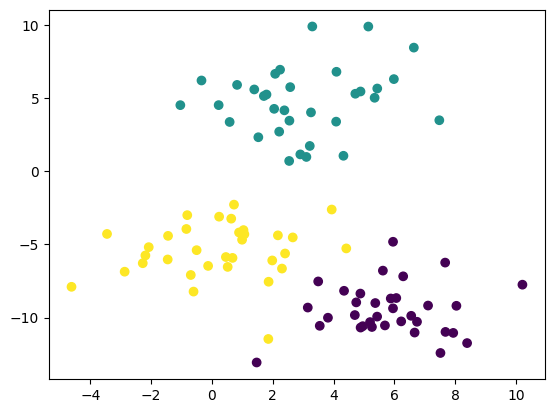

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [ ]:
cluster_centers = [X[np.random.randint(0, X.shape[0]), :] for _ in range(k)]
for i in range(100):
  points = [[] for i in range(k)]

  for data in X:
    dist = [np.sum((data - i)**2)**0.5 for i in cluster_centers]
  
    idx = dist.index(min(dist))
    points[idx].append(data)

  for i in range(k):
    cluster_centers[i] = np.mean(points[i], axis = 0)
  
cluster_centers = np.array(cluster_centers)

In [ ]:
def predict_memberships(clusters, data):
  dist = np.array([1/(np.sum((data - i)**2)**0.5) for i in clusters])
  dist = dist/np.sum(dist)
  dist = np.exp(dist)
  dist = dist/np.sum(dist)
  return dist

In [ ]:
predict_memberships(cluster_centers, X[np.random.randint(0, X.shape[0]), :])

array([0.42163448, 0.31045893, 0.26790659])

In [ ]:
predict_memberships(cluster_centers, X[3, :])

array([0.24769953, 0.51676073, 0.23553973])

In [ ]:
X[3, :]

array([  6.22683284, -10.26022569])

In [ ]:
cluster_centers

array([[ 0.01929006, -5.2349797 ],
       [ 5.66180367, -9.43779083],
       [ 3.00804963,  4.74073078]])